In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Libraries to scale the data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler

# Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.decomposition import PCA

# Bayesian Optimization libraries
from functools import partial
from skopt import gp_minimize
from skopt import space
from sklearn import model_selection

# Performance Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Ignores runtime warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

### Analysis on K-means Imputed and Outlier Presence dataset

In [2]:
df1 = pd.read_csv("../processed-datasets/data_with_outliers_kmeans_imputed.csv")

In [3]:
df1.head()

Unnamed: 0  age_ma  Feature     Ti     La     Ce     Pr      Nd     Sm  \
0           0   222.0      0.0   7.88   0.05   10.5   0.05    4.25  11.60   
1           1   222.0      0.0  10.90  69.10  169.0  22.50  132.00  41.80   
2           2   222.0      0.0   6.00   0.02   25.1   0.30    4.41  13.80   
3           3   222.0      0.0   9.06   0.28   12.0   0.07    1.88   5.08   
4           4   222.0      0.0   4.93   0.07   16.5   0.15    2.32   8.23   

     Eu  ...     Dy     Ho     Er     Tm      Yb     Lu       Y       Hf  \
0  1.99  ...  295.0  125.0  526.0  129.0  1077.0  199.0  2737.0  12390.0   
1  4.34  ...  361.0  147.0  611.0  148.0  1232.0  228.0  3226.0  12591.0   
2  2.30  ...  415.0  172.0  701.0  167.0  1358.0  248.0  3675.0  12724.0   
3  1.01  ...  194.0   83.0  356.0   89.5   762.0  144.0  1832.0  12894.0   
4  1.52  ...  257.0  108.0  456.0  111.0   936.0  171.0  2355.0  12535.0   

       U     Th  
0  305.0  134.0  
1  503.0  272.0  
2  639.0  414.0  
3  308.0  127.0  
4  348.0  155.0  

[5 rows x 22 columns]

In [4]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df1.sample(5)

age_ma  Feature     Ti    La     Ce    Pr    Nd    Sm    Eu     Gd  \
846   1643.31      0.0  16.09  2.24   5.72  0.14  2.91  5.72  0.40  28.64   
1502    38.00      1.0   3.28  0.01  22.00  0.07  1.33  2.58  0.66  12.40   
496     59.90      0.0   4.87  4.48  28.47  1.27  6.72  4.19  0.43  17.92   
2982    21.30      0.0  10.63  0.02   9.00  0.24  3.48  5.06  0.73  22.70   
1722    41.00      1.0   2.89  0.07  41.30  0.08  1.00  2.57  1.20  13.90   

      ...      Dy     Ho      Er     Tm     Yb     Lu        Y        Hf  \
846   ...  107.20  38.38  171.18  33.17  289.0  52.13  1088.18  11151.83   
1502  ...   50.10  18.90   90.00  21.90  219.0  42.00   609.00   9943.00   
496   ...   84.89  33.83  161.30  35.91  346.2  72.92  1055.00  10258.00   
2982  ...   76.20  25.60  108.60  23.40  207.0  35.70   779.00   8992.00   
1722  ...   61.90  25.80  131.00  31.40  352.0  79.70   919.00  11326.00   

            U      Th  
846    111.41   49.98  
1502   184.00  159.00  
496    494.00  292.80  
2982   102.00   93.00  
1722  1548.00  581.00  

[5 rows x 21 columns]

In [6]:
# X: Input Features

X = df1.drop('Feature', axis=1).values

# Output Feature
y = df1.Feature.values.astype(int)

### Splitting the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
# Notice that Scales are different for each of the features
pd.DataFrame(X_train)

0      1     2      3     4     5     6     7      8      9   \
0      269.00  18.70  0.01   2.51  0.12  3.19  6.93  0.15  35.80  11.70   
1     2482.00   2.30  0.05  20.20  0.04  1.00  1.53  0.32   6.96   2.33   
2       58.70   3.28  0.04  17.51  0.15  0.35  1.12  0.18   9.93   3.64   
3      235.00   6.78  0.01   4.04  0.10  1.23  3.01  0.20  16.20   4.28   
4       16.00   5.10  0.08  68.50  0.20  3.18  7.40  2.66  46.20  16.00   
...       ...    ...   ...    ...   ...   ...   ...   ...    ...    ...   
2385     3.80   4.00  0.01   5.43  0.01  0.08  0.37  0.39   3.05   1.01   
2386    21.00   1.90  0.01  24.70  0.03  0.92  1.19  0.72   8.20   2.65   
2387     0.76   2.22  0.07  21.62  0.07  1.35  4.54  0.06  34.39  16.03   
2388     0.76   2.15  0.04  37.00  0.08  1.58  6.95  0.06  53.27  24.91   
2389    21.00   3.90  0.01  26.30  0.05  0.97  1.20  0.72   8.00   2.47   

          10      11      12      13       14      15       16        17  \
0     128.00   45.00  186.00   39.20   351.00   56.70  1285.00  12138.00   
1      28.30   10.38   48.05   10.75   134.27   19.05   334.41   8778.74   
2      52.18   23.92  126.00   32.80   350.40   81.81   807.00  10528.00   
3      50.90   17.60   79.90   16.10   171.00   29.20   575.00  13503.00   
4     209.00   79.80  404.00   83.20   780.00  165.00  3120.00   9550.00   
...      ...     ...     ...     ...      ...     ...      ...       ...   
2385   15.61    6.63   37.70    8.79    96.70   23.20   224.00   7745.00   
2386   33.90   14.50   80.20   20.40   206.00   53.80   503.00   9340.00   
2387  212.71   93.06  437.24  101.57   889.52  198.52  3033.32  13057.60   
2388  323.41  138.97  642.92  145.69  1261.42  274.92  4411.90  13018.22   
2389   32.80   14.76   83.40   20.20   221.30   57.30   517.00   9030.00   

           18       19  
0      215.00   124.00  
1      105.13    56.90  
2      463.00   210.10  
3      629.00   163.00  
4      704.00   714.00  
...       ...      ...  
2385    50.20    31.60  
2386   844.00   298.00  
2387  1660.67   499.24  
2388  2966.68  1147.33  
2389   927.00   345.00  

[2390 rows x 20 columns]

### Scaling the data using Standard Scaler

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled.shape

(2390, 20)

In [11]:
pd.DataFrame(X_train_scaled)

0         1         2         3         4         5         6   \
0    -0.211371 -0.017620 -0.186751 -0.449247 -0.176826 -0.119556 -0.025699   
1     3.304637 -0.070385 -0.184156 -0.155421 -0.186199 -0.178974 -0.222378   
2    -0.545495 -0.067232 -0.184804 -0.200101 -0.173311 -0.196610 -0.237311   
3    -0.265390 -0.055971 -0.186751 -0.423834 -0.179169 -0.172734 -0.168473   
4    -0.613337 -0.061376 -0.182209  0.646830 -0.167453 -0.119827 -0.008580   
...        ...       ...       ...       ...       ...       ...       ...   
2385 -0.632720 -0.064915 -0.186751 -0.400747 -0.189714 -0.203935 -0.264628   
2386 -0.605393 -0.071672 -0.186751 -0.080677 -0.187371 -0.181145 -0.234762   
2387 -0.637550 -0.070642 -0.182858 -0.131835 -0.182684 -0.169478 -0.112748   
2388 -0.637550 -0.070867 -0.184804  0.123623 -0.181513 -0.163238 -0.024970   
2389 -0.605393 -0.065237 -0.186751 -0.054101 -0.185027 -0.179788 -0.234398   

            7         8         9         10        11        12        13  \
0    -0.250387  0.031710 -0.028971 -0.026737 -0.064853 -0.083754 -0.128663   
1    -0.213630 -0.267325 -0.225488 -0.225309 -0.306673 -0.333153 -0.383986   
2    -0.243900 -0.236530 -0.198013 -0.177748 -0.212097 -0.192227 -0.186099   
3    -0.239576 -0.171518 -0.184591 -0.180297 -0.256242 -0.275571 -0.335973   
4     0.292309  0.139545  0.061213  0.134591  0.178225  0.310368  0.266212   
...        ...       ...       ...       ...       ...       ...       ...   
2385 -0.198496 -0.307867 -0.253172 -0.250584 -0.332867 -0.351864 -0.401576   
2386 -0.127145 -0.254468 -0.218777 -0.214156 -0.277895 -0.275029 -0.297382   
2387 -0.269846  0.017090  0.061842  0.141980  0.270846  0.370462  0.431073   
2388 -0.269846  0.212852  0.248083  0.362461  0.591528  0.742310  0.827025   
2389 -0.127145 -0.256542 -0.222552 -0.216347 -0.276079 -0.269244 -0.299177   

            14        15        16        17        18        19  
0    -0.158221 -0.265853 -0.057201  0.502843 -0.238694 -0.195953  
1    -0.386669 -0.518558 -0.304688 -0.339366 -0.299697 -0.247468  
2    -0.158853 -0.097315 -0.181649  0.099196 -0.100996 -0.129850  
3    -0.347953 -0.450431 -0.242050  0.845066 -0.008827 -0.166011  
4     0.293975  0.461053  0.420541 -0.146001  0.032816  0.257012  
...        ...       ...       ...       ...       ...       ...  
2385 -0.426270 -0.490703 -0.333433 -0.598537 -0.330196 -0.266892  
2386 -0.311061 -0.285317 -0.260795 -0.198651  0.110548 -0.062366  
2387  0.409417  0.686038  0.397974  0.733398  0.563991  0.092133  
2388  0.801425  1.198832  0.756888  0.723525  1.289133  0.589696  
2389 -0.294933 -0.261825 -0.257150 -0.276371  0.156633 -0.026283  

[2390 rows x 20 columns]

### Fitting the base model

In [12]:
lr_base = LogisticRegression()

lr_base.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
y_pred = lr_base.predict(X_test_scaled)

In [14]:
print("Accuracy of the base model: ", round(accuracy_score(y_test, y_pred), 2))

Accuracy of the base model:  0.84


In [15]:
print("Classification report of the base model: \n\n", classification_report(y_test, y_pred))

Classification report of the base model: 

               precision    recall  f1-score   support

           0       0.86      0.82      0.84       316
           1       0.81      0.85      0.83       282

    accuracy                           0.84       598
   macro avg       0.84      0.84      0.84       598
weighted avg       0.84      0.84      0.84       598



### Plotting the Confusion Matrix

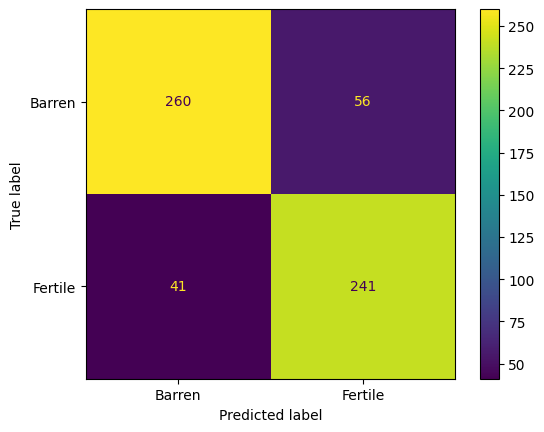

In [16]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

#### The model performance is average as it can be observed that False Positives (FP) and False Negatives (FN) are huge.

### Hyper-Parameter Tuning

### Grid Search Optimization with stratified K-fold Cross Validation

In [17]:
Stratified_kf = StratifiedKFold(n_splits=10, shuffle=True)

In [18]:
param_grid = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'dual': [True, False],
                'C': [0, 0.5, 1],
                'fit_intercept': [True, False],
                'class_weight': ['balanced'],
                'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
                'max_iter': [100, 500, 1000],
                'n_jobs': [-1]
    
}

# 4 * 2 * 3 * 2 * 1 * 4 * 3 * 1 = 576 * 10 (Each combination will be run 10 times and avg is taken) = 5760

In [19]:
clf = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid, scoring='accuracy', n_jobs=-1,
                   cv = Stratified_kf, return_train_score=True, verbose=10)

In [20]:
clf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV 3/10; 1/576] START C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 3/10; 1/576] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 3/576] START C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 7/10; 3/576] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 3/576] START C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 9/10; 3/576] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=na

[CV 6/10; 51/576] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 51/576] START C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 7/10; 51/576] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 51/576] START C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 8/10; 51/576] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 51/576] START C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 9/10; 51/576] END C=0, clas

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg
[CV 6/10; 119/576] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 119/576] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg
[CV 7/10; 119/576] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 119/576] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg
[CV 8/10; 119/576] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 119/576] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_i

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

[CV 1/10; 240/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 240/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 2/10; 240/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 240/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 3/10; 240/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 240/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, pe

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `pen

[CV 10/10; 181/576] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear
[CV 10/10; 181/576] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 182/576] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs
[CV 1/10; 182/576] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 182/576] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs
[CV 2/10; 182/576] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 182/576] START C=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Go

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages

[CV 10/10; 244/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 10/10; 244/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 296/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 3/10; 296/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.838, test=0.833) total time=   0.0s
[CV 4/10; 296/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 4/10; 296/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.837

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

3/10; 219/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 3/10; 219/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 219/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 4/10; 219/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 321/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=liblinear
[CV 9/10; 321/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.850, test=0.866) to

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #7. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.p

ty=l1, solver=newton-cholesky
[CV 5/10; 260/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 260/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 6/10; 260/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 260/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 7/10; 260/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 260/576] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_ite

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/pyt

[CV 6/10; 289/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.856, test=0.854) total time=   0.1s
[CV 7/10; 289/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 7/10; 289/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.858, test=0.858) total time=   0.1s
[CV 8/10; 289/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 8/10; 289/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.865, test=0.866) total time=   0.1s
[CV 9/10; 289/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `pen

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 6/10; 323/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 323/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 7/10; 323/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 323/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 8/10; 323/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 323/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 9/1

[CV 7/10; 305/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.858, test=0.858) total time=   0.1s
[CV 8/10; 305/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear
[CV 8/10; 305/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.865, test=0.866) total time=   0.1s
[CV 9/10; 305/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear
[CV 9/10; 305/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.850, test=0.866) total time=   0.0s
[CV 10/10; 305/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penal

e, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 8/10; 393/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 393/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 9/10; 393/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 393/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 10/10; 278/576] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 279/576] START C=0.5, class_weight=balan

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_j

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

[CV 3/10; 400/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 3/10; 400/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 400/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 4/10; 400/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 400/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 5/10; 400/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) to

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(

/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=0.851, test=0.862) total time=   0.1s
[CV 9/10; 421/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear
[CV 9/10; 421/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=0.840, test=0.866) total time=   0.1s
[CV 10/10; 421/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear
[CV 10/10; 421/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=0.846, test=0.828) total time=   0.1s
[CV 1/10; 422/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs
[CV 1/10; 422/576] END C=1, 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linea

[CV 3/10; 405/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear
[CV 3/10; 405/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=0.845, test=0.833) total time=   0.1s
[CV 4/10; 405/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear
[CV 4/10; 405/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=0.842, test=0.841) total time=   0.1s
[CV 5/10; 405/576] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear
[CV 5/10; 405/576] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=0.842, test=0.854) total time=   0.1s
[CV 6/10; 405/576] 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_r

[CV 1/10; 336/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=0.892, test=0.870) total time=   0.1s
[CV 2/10; 336/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 2/10; 336/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=0.896, test=0.862) total time=   0.1s
[CV 3/10; 336/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 3/10; 336/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=0.893, test=0.895) total time=   0.1s
[CV 4/10; 336/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or

ain=0.795, test=0.841) total time=   0.1s
[CV 9/10; 337/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 9/10; 337/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.788, test=0.778) total time=   0.1s
[CV 10/10; 337/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 10/10; 337/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.789, test=0.787) total time=   0.1s
[CV 1/10; 338/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 1/10; 338/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(tra

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/

ercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 355/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 2/10; 355/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 355/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 3/10; 355/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 355/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 4/10; 355/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages

[CV 1/10; 315/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 1/10; 315/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 315/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 2/10; 315/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 315/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 3/10; 315/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  w

[CV 10/10; 475/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 476/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky
[CV 1/10; 476/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 476/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky
[CV 2/10; 476/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 476/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, se

e=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 456/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 6/10; 456/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 456/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 7/10; 456/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 456/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 8/10; 456/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-chol

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

[CV 9/10; 464/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 9/10; 464/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 464/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 10/10; 464/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 465/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l1, solver=liblinear
[CV 1/10; 465/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=nan, test=nan) total ti

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #7. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3

[CV 5/10; 368/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=0.854, test=0.828) total time=   0.0s
[CV 6/10; 368/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 6/10; 368/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=0.847, test=0.874) total time=   0.0s
[CV 7/10; 368/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky
[CV 7/10; 368/576] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=(train=0.852, test=0.837) total time=   0.0s
[CV 8/10; 368/576] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=

[CV 5/10; 522/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 522/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs
[CV 6/10; 522/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 522/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs
[CV 7/10; 522/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 522/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=l

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

[CV 7/10; 516/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 516/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 8/10; 516/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 516/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 9/10; 516/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 516/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l1, solve

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'sol

[CV 7/10; 490/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 490/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs
[CV 8/10; 490/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 490/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs
[CV 9/10; 490/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 490/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/miniconda3/lib/python3.9/site-packages/sklea

[CV 2/10; 504/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.849, test=0.812) total time=   0.0s
[CV 3/10; 504/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 3/10; 504/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.844, test=0.833) total time=   0.0s
[CV 4/10; 504/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 4/10; 504/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.841, test=0.841) total time=   0.0s
[CV 5/10; 504/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: Futu

[CV 7/10; 474/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 474/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs
[CV 8/10; 474/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 474/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs
[CV 9/10; 474/576] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 474/576] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #7. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/opt/miniconda3/lib/python3

[CV 7/10; 519/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=0.844, test=0.841) total time=   0.0s
[CV 8/10; 519/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg
[CV 8/10; 519/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=0.852, test=0.862) total time=   0.0s
[CV 9/10; 519/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg
[CV 9/10; 519/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=0.840, test=0.866) total time=   0.0s
[CV 10/10; 519/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg
[CV 10

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #8. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(

[CV 8/10; 546/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 546/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 9/10; 546/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 546/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 10/10; 546/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 547/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 1/10; 547/576] END C=1, class_wei

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_m

[CV 4/10; 500/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 500/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 5/10; 500/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 500/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 6/10; 500/576] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 500/576] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=newto

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: Futu

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0, 0.5, 1], 'class_weight': ['balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [21]:
clf.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced', max_iter=500, n_jobs=-1,
                   penalty='none', solver='newton-cholesky')

In [22]:
clf.best_params_

{'C': 0.5,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'max_iter': 500,
 'n_jobs': -1,
 'penalty': 'none',
 'solver': 'newton-cholesky'}

In [23]:
print("Best accuracy obtained: ", round(clf.best_score_, 2))

Best accuracy obtained:  0.89


### Predicting the test set outcomes over best parameters

In [24]:
best_model_gridsearch = LogisticRegression(**clf.best_params_)

In [25]:
best_model_gridsearch.fit(X_train_scaled, y_train)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #7. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=500, n_jobs=-1,
                   penalty='none', solver='newton-cholesky')

In [26]:
y_pred_best = best_model_gridsearch.predict(X_test_scaled)

In [27]:
print("Accuracy of the test set on tuned model: ", round(accuracy_score(y_test, y_pred_best), 2))

Accuracy of the test set on tuned model:  0.9


In [28]:
print("Classification report of test set on the tuned model: \n\n", classification_report(y_test, y_pred_best))

Classification report of test set on the tuned model: 

               precision    recall  f1-score   support

           0       0.95      0.85      0.90       316
           1       0.85      0.95      0.90       282

    accuracy                           0.90       598
   macro avg       0.90      0.90      0.90       598
weighted avg       0.90      0.90      0.90       598



### Plotting the Confusion Matrix

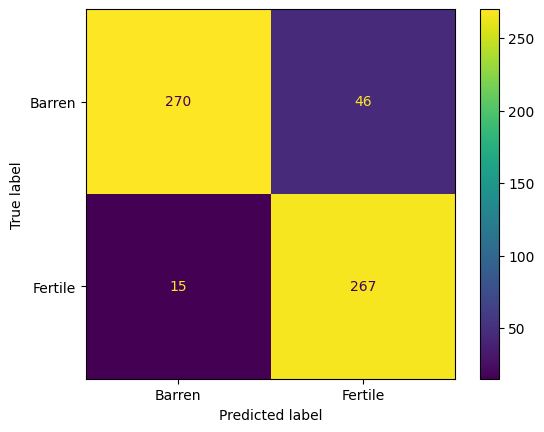

In [29]:
cm = confusion_matrix(y_test, y_pred_best)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

### Analysis on K-means Imputed and Outlier Handled dataset

In [30]:
df2 = pd.read_csv("../processed-datasets/data_outliers_handled_kmeans_imputed.csv")

In [31]:
df2.head()

Unnamed: 0  age_ma  Feature     Ti     La      Ce     Pr       Nd  \
0           0   222.0      0.0   7.88  0.050  10.500  0.050  4.25000   
1           1   222.0      0.0  10.90  1.555  61.505  0.725  7.74125   
2           2   222.0      0.0   6.00  0.020  25.100  0.300  4.41000   
3           3   222.0      0.0   9.06  0.280  12.000  0.070  1.88000   
4           4   222.0      0.0   4.93  0.070  16.500  0.150  2.32000   

         Sm       Eu  ...         Dy        Ho         Er       Tm       Yb  \
0  11.60000  1.99000  ...  259.21625  106.1375  437.54375  97.8675  936.725   
1  12.56125  2.64375  ...  259.21625  106.1375  437.54375  97.8675  936.725   
2  12.56125  2.30000  ...  259.21625  106.1375  437.54375  97.8675  936.725   
3   5.08000  1.01000  ...  194.00000   83.0000  356.00000  89.5000  762.000   
4   8.23000  1.52000  ...  257.00000  106.1375  437.54375  97.8675  936.000   

          Lu           Y       Hf      U     Th  
0  172.63875  2737.00000  12390.0  305.0  134.0  
1  172.63875  2804.03875  12591.0  503.0  272.0  
2  172.63875  2804.03875  12724.0  639.0  414.0  
3  144.00000  1832.00000  12894.0  308.0  127.0  
4  171.00000  2355.00000  12535.0  348.0  155.0  

[5 rows x 22 columns]

In [32]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
df2.sample(5)

age_ma  Feature    Ti     La      Ce     Pr       Nd     Sm       Eu  \
2072   19.9300      1.0  2.87  0.020  61.505  0.090  1.77000   4.42  1.52000   
1502   38.0000      1.0  3.28  0.010  22.000  0.070  1.33000   2.58  0.66000   
423    18.3000      0.0  9.20  0.030   9.220  0.050  0.57000   1.84  0.17000   
2391  370.0000      1.0  9.42  0.030  14.430  0.060  0.93000   2.30  0.76000   
1131  839.3875      0.0  8.88  1.555  61.505  0.725  7.74125  10.85  2.64375   

         Gd  ...      Dy     Ho      Er     Tm      Yb      Lu        Y  \
2072  27.50  ...  126.20  51.00  259.80  67.80  772.00  162.70  1797.00   
1502  12.40  ...   50.10  18.90   90.00  21.90  219.00   42.00   609.00   
423   12.60  ...   72.65  29.07  135.15  28.93  281.56   52.44   884.60   
2391  12.11  ...   60.20  24.88  133.44  33.59  367.75   69.66   779.54   
1131  20.09  ...   63.82  22.51  116.26  27.74  330.53   47.91   729.30   

            Hf         U        Th  
2072  12072.00  1142.375  701.7125  
1502   9943.00   184.000  159.0000  
423    9300.00   203.530  131.6700  
2391   9297.50   115.220   46.9000  
1131   9153.08   277.770   91.3600  

[5 rows x 21 columns]

In [34]:
X = df2.drop('Feature', axis=1).values # input features
y = df2.Feature.values.astype(int) # output feature

### Splitting the dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Scaling the data using Standard Scaler

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the base model

In [37]:
lr_base = LogisticRegression()

lr_base.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
y_pred = lr_base.predict(X_test_scaled)

In [39]:
print("Accuracy of the base model: ", round(accuracy_score(y_test, y_pred), 2))

Accuracy of the base model:  0.9


In [40]:
print("Classification report of the base model: \n\n", classification_report(y_test, y_pred))

Classification report of the base model: 

               precision    recall  f1-score   support

           0       0.93      0.88      0.91       340
           1       0.86      0.92      0.89       258

    accuracy                           0.90       598
   macro avg       0.90      0.90      0.90       598
weighted avg       0.90      0.90      0.90       598



### Plotting the Confusion Matrix

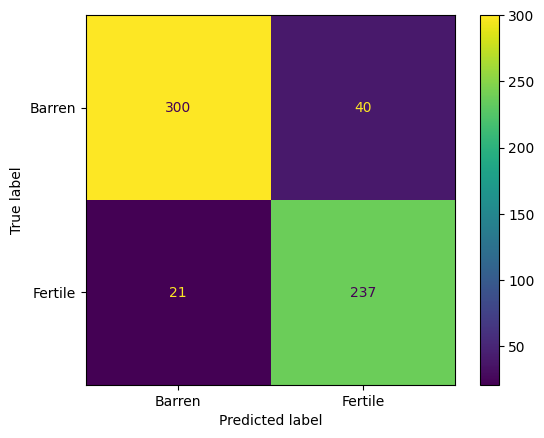

In [41]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

### Hyper-Parameter Tuning

### Grid Search Optimization with stratified K-fold Cross Validation

In [42]:
Stratified_kf = StratifiedKFold(n_splits=10, shuffle=True)

In [43]:
param_grid = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'dual': [True, False],
                'C': [0, 0.5, 1],
                'fit_intercept': [True, False],
                'class_weight': ['balanced'],
                'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
                'max_iter': [100, 500],
                'n_jobs': [-1]
    
             }

In [44]:
clf = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid, scoring='accuracy', n_jobs=-1,
                   cv = Stratified_kf, return_train_score=True, verbose=10)

In [45]:
clf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[CV 1/10; 537/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 537/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 2/10; 537/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 537/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 3/10; 537/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 537/576] START C=1, class_weight=balanced, d

[CV 10/10; 25/384] START C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 10/10; 25/384] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 569/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 569/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 3/10; 569/576] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 569/576] START C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

ART C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs
[CV 2/10; 62/384] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 62/384] START C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs
[CV 3/10; 62/384] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 62/384] START C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs
[CV 4/10; 62/384] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 62/384] START C=0, class_weight=balanced, dual=True, 

[CV 2/10; 81/384] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear
[CV 2/10; 81/384] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 81/384] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear
[CV 3/10; 81/384] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CValanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 118/384] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs
[CV 1/10; 118/384] END C=0, class_weight=balanced, dual=False, fit_int

Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect wh

lver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 111/384] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg
[CV 4/10; 111/384] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 111/384] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg
[CV 5/10; 111/384] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 111/384] START C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg
[CV 6/10; 111/384] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=ne

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 6/10; 69/384] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear
[CV 6/10; 69/384] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 69/384] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear
[CV 7/10; 69/384] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 69/384] START C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear
[CV 8/10; 69/384] END C=0, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 127/384] START C=0, c

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `pen

[CV 4/10; 268/384] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 268/384] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky
[CV 5/10; 268/384] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 268/384] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky
[CV 6/10; 268/384] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 268/384] START C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_rat

[CV 9/10; 162/384] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 9/10; 162/384] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 162/384] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 10/10; 162/384] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 163/384] START C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 1/10; 163/384] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 163/384] START C=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_rat

[CV 1/10; 132/384] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 132/384] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 2/10; 132/384] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 132/384] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky
[CV 3/10; 132/384] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 132/384] START C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages

[CV 8/10; 243/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 8/10; 243/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 243/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 9/10; 243/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 243/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 10/10; 243/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 1

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/

[CV 8/10; 290/384] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 8/10; 290/384] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 290/384] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 9/10; 290/384] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 290/384] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 10/10; 290/384] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 291/384] START C=1, class_weight=bala

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 

[CV 1/10; 193/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 1/10; 193/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.871, test=0.870) total time=   0.1s
[CV 2/10; 193/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 2/10; 193/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.876, test=0.887) total time=   0.2s
[CV 3/10; 193/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear
[CV 3/10; 193/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=(train=0.871, test=0.887) total time=   0.1s
[

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_rat

[CV 9/10; 232/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.848, test=0.837) total time=   0.0s
[CV 10/10; 232/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 10/10; 232/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.843, test=0.870) total time=   0.0s
[CV 1/10; 233/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 1/10; 233/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 233/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_j

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

s=-1, penalty=l2, solver=newton-cholesky
[CV 9/10; 248/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.848, test=0.837) total time=   0.0s
[CV 10/10; 248/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky
[CV 10/10; 248/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=(train=0.843, test=0.870) total time=   0.0s
[CV 1/10; 249/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear
[CV 1/10; 249/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 249/384] START C=0.5, class_weight=balanced, dual=Fals

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does n

[CV 8/10; 306/384] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 306/384] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 9/10; 306/384] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10; 306/384] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs
[CV 10/10; 306/384] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10; 307/384] START C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l1, solver=newton-cg
[CV 1/10; 307/384] END C=1, class_weight=ba

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

[CV 7/10; 219/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 7/10; 219/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 219/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 8/10; 219/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 219/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 9/10; 219/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To

[CV 3/10; 253/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=liblinear
[CV 3/10; 253/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 253/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=liblinear
[CV 4/10; 253/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 253/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=liblinear
[CV 5/10; 253/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'sol

[CV 5/10; 343/384] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=(train=0.873, test=0.858) total time=   0.0s
[CV 7/10; 351/384] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg
[CV 7/10; 351/384] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=(train=0.876, test=0.862) total time=   0.0s
[CV 8/10; 351/384] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg
[CV 8/10; 351/384] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=(train=0.878, test=0.841) total time=   0.0s
[CV 9/10; 351/384] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg
[CV

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: Conve

[CV 6/10; 237/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 237/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear
[CV 7/10; 237/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10; 237/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear
[CV 8/10; 237/384] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10; 237/384] START C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=libli

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_m

[CV 1/10; 331/384] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 331/384] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 2/10; 331/384] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 331/384] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cg
[CV 3/10; 331/384] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 331/384] START C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasti

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: Futu

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0, 0.5, 1], 'class_weight': ['balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 500], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [46]:
clf.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1, penalty='none')

In [47]:
clf.best_params_

{'C': 0.5,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'n_jobs': -1,
 'penalty': 'none',
 'solver': 'lbfgs'}

In [48]:
print("Best accuracy obtained: ", round(clf.best_score_, 2))

Best accuracy obtained:  0.87


### Predicting the test set outcomes over best parameters

In [49]:
best_model_gridsearch = LogisticRegression(**clf.best_params_)

In [50]:
best_model_gridsearch.fit(X_train_scaled, y_train)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1, penalty='none')

In [51]:
y_pred_best = best_model_gridsearch.predict(X_test_scaled)

In [52]:
print("Accuracy of the test set on tuned model: ", round(accuracy_score(y_test, y_pred_best), 2))

Accuracy of the test set on tuned model:  0.9


In [53]:
print("Classification report of test set on tuned model: \n\n", classification_report(y_test, y_pred_best))

Classification report of test set on tuned model: 

               precision    recall  f1-score   support

           0       0.94      0.88      0.91       340
           1       0.85      0.93      0.89       258

    accuracy                           0.90       598
   macro avg       0.90      0.90      0.90       598
weighted avg       0.90      0.90      0.90       598



### Plotting the Confusion Matrix

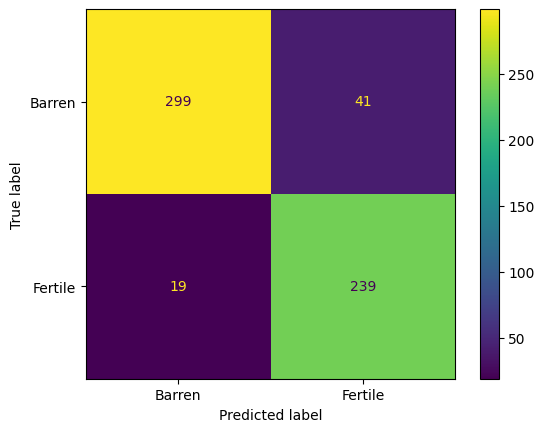

In [54]:
cm = confusion_matrix(y_test, y_pred_best)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

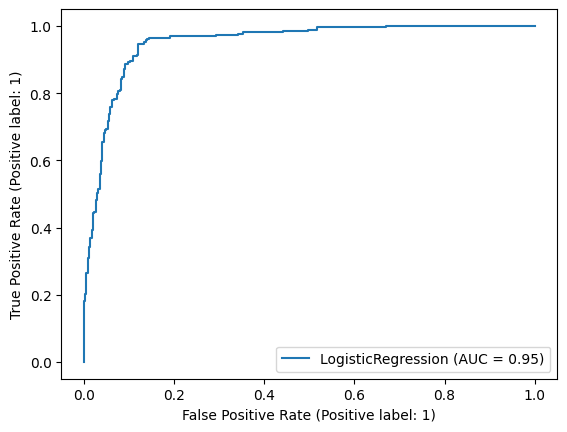

In [55]:
metrics.RocCurveDisplay.from_estimator(best_model_gridsearch, X_test_scaled, y_test)

### Plotting the decision boundary

In [56]:
input_features = X_test_scaled.copy()
output_feature = y_test.copy()

In [57]:
pca = PCA(n_components = 2)

X_reduced = pca.fit_transform(input_features)

In [58]:
X_reduced.shape

(598, 2)

In [59]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [60]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [61]:
plot_model = LogisticRegression(**clf.best_params_)

plot_model.fit(X_reduced, output_feature)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1, penalty='none')

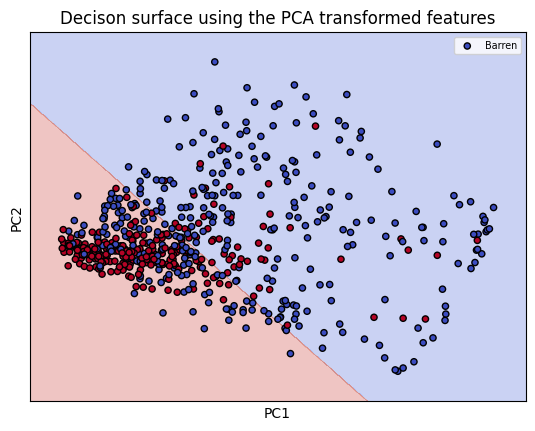

In [62]:
fig, ax = plt.subplots(facecolor='white')

# title for the plots
title = ('Decision surface of Tuned SVC ')

# Set-up grid for plotting.
X0, X1 = X_reduced[:, 0], X_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, plot_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.3) # alpha=0.8
ax.scatter(X0, X1, c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed features')
ax.legend(labels=['Barren', 'Fertile'], fontsize="x-small")
plt.show()